2.0.0
60000


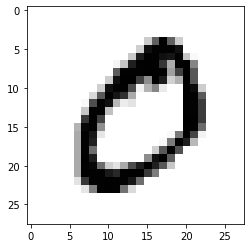

In [39]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

from tensorflow import keras
from tensorflow.keras import layers


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train))

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()



In [8]:
print(y_train[1])

0


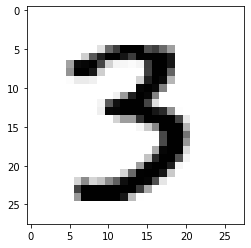

In [9]:
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)

In [10]:
plt.show()
print((index+1), '번째 이미지의 숫자는 바로', y_train[index], '입니다.')

10001 번째 이미지의 숫자는 바로 3 입니다.


In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
print(x_train.shape)

(60000, 28, 28)


In [13]:
print(x_test.shape)

(10000, 28, 28)


In [14]:
print('최소값:',np.min(x_train), '최대값:',np.max(x_train))

최소값: 0 최대값: 255


In [15]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

print('최소값:',np.min(x_train_norm), '최대값:',np.max(x_train_norm))

최소값: 0.0 최대값: 1.0


In [20]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28,28,1)))

In [23]:
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [25]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)
# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))


Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [26]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2046 - accuracy: 0.9391
Epoch 2/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0640 - accuracy: 0.9806
Epoch 3/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0456 - accuracy: 0.9858
Epoch 4/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0366 - accuracy: 0.9889
Epoch 5/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0299 - accuracy: 0.9906
Epoch 6/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0242 - accuracy: 0.9924
Epoch 7/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0208 - accuracy: 0.9931
Epoch 8/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0174 - accuracy: 0.9945
Epoch 9/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0145 - accuracy: 0.9952
Epoch

In [27]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10000/1 - 1s - loss: 0.0200 - accuracy: 0.9889
test_loss: 0.039935466665113196 
test_accuracy: 0.9889000058174133


In [28]:
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)
idx=0 #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])


model.predict() 결과 :  [3.7970273e-11 4.8313749e-09 3.4057410e-07 1.6963037e-07 5.2347757e-12
 2.7552507e-09 9.4025097e-17 9.9999940e-01 4.1854809e-10 8.1575728e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


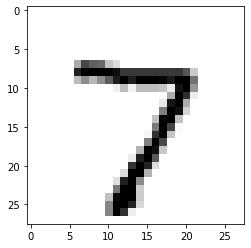

In [29]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

In [32]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):

    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

In [33]:
samples = random.choices(population=wrong_predict_list, k=5)

예측확률분포: [7.3811716e-06 5.9583126e-05 1.6410485e-02 4.4488617e-05 1.1429677e-03
 2.8562539e-09 9.1022040e-10 9.6521777e-01 6.0883150e-03 1.1028984e-02]
라벨: 2, 예측결과: 7
예측확률분포: [2.0731903e-08 5.1018360e-06 1.1544921e-04 2.5603160e-05 7.5120153e-07
 1.2601806e-05 1.2149564e-09 1.2829955e-02 2.7824166e-01 7.0876890e-01]
라벨: 8, 예측결과: 9
예측확률분포: [5.12611210e-01 3.76539272e-10 2.45058629e-07 1.72397622e-03
 1.40788692e-09 1.47663837e-03 5.79138977e-08 1.13089885e-11
 4.25905228e-01 5.82826659e-02]
라벨: 8, 예측결과: 0
예측확률분포: [8.5431552e-01 2.9632002e-08 8.1556282e-05 2.7544127e-04 3.1732206e-09
 2.9301436e-05 1.5608567e-08 1.1631920e-05 1.4521776e-01 6.8597154e-05]
라벨: 8, 예측결과: 0
예측확률분포: [6.5898132e-07 1.2162751e-06 1.7196662e-08 8.0779057e-05 2.6075316e-03
 6.7882168e-01 9.9915997e-07 1.5595981e-08 2.3552265e-04 3.1825170e-01]
라벨: 9, 예측결과: 5


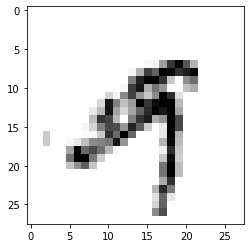

In [35]:
for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()


In [36]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=
(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))

In [37]:
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [6]:
!pip install pillow
from PIL import Image

In [7]:
import os, glob
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [8]:
import os

image_dir_path = "./rock_scissor_paper/scissor//*.jpg"
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.jpg")

이미지 디렉토리 경로:  ./rock_scissor_paper/scissor//*.jpg


In [9]:
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("가위 이미지 resize 완료!")

가위 이미지 resize 완료!


In [10]:
image_dir_path = "./rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.jpg")


이미지 디렉토리 경로:  ./rock_scissor_paper/rock


In [11]:
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("바위 이미지 resize 완료!")

바위 이미지 resize 완료!


In [12]:
image_dir_path = "./rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.jpg")


이미지 디렉토리 경로:  ./rock_scissor_paper/paper


In [19]:
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("보 이미지 resize 완료!")

보 이미지 resize 완료!


In [44]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

from tensorflow import keras
from tensorflow.keras import layers


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(img_path):
    number_of_data = 300
    img_size = 28
    color = 3

    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)


    idx=0
    
    for file in glob.iglob('./rock_scissor_paper/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 # 가위 : 0
        idx=idx+1
    
    for file in glob.iglob('./rock_scissor_paper/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32) 
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사 labels[idx]=1 # 바위 : 1
        idx=idx+1
      
    for file in glob.iglob('./rock_scissor_paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2 # 보 : 2
        idx=idx+1

    return imgs, labels

print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")


image_dir_path ="./aiffel/rock_scissor_paper/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


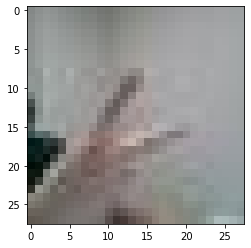

In [47]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  0


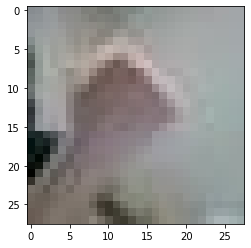

In [48]:
plt.imshow(x_train[101])
print('라벨: ', y_train[101])

라벨:  2


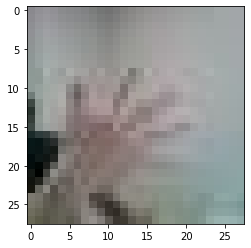

In [49]:
plt.imshow(x_train[201])
print('라벨: ', y_train[201])